In [20]:
# Author: Lucas Victor , M.Sc student at Valongo (UFRJ), 2021
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#lendo o arquivo
dados = pd.read_csv('lista1.csv', delimiter = ' ', encoding='UTF-8')

In [22]:
dados.head(2)

,lambd_A,a_0,a_1,2a_2,I_lambd(0_0)
0,3737,0.1435,0.9481,-0.0920,420000000000000
1,4260,0.1754,0.9740,-0.1525,449000000000000


In [23]:
#Definindo um intervalo de profundidade óptica
tau = [0.0,0.2,0.4,0.6,0.8] 
dados['tau'] = tau

In [24]:
#efinindo constantes
h = 6.6260755*pow(10,-27) #erg.s 
c = 2.99792458*pow(10,10) #cm.s^-1
k = 1.380658*pow(10,-16) #erg.k^-1
sigma = 5.67051*pow(10,-5) #stefan-boltazmann constant

In [25]:
#convertendo comprimento de onda de Angstrom p/ cm e guardando em uma nova coluna
dados['lambd_A'] = dados['lambd_A']*pow(10,-8)

In [26]:
#Calculando a Intensidade específica para cada comprimento de onda
for i in dados:
    dados['I_3737'] = (dados.iloc[0,1] + dados.iloc[0,2]*dados['tau']+dados.iloc[0,3]*dados['tau']**2)*dados.iloc[0,4]
    dados['I_4260'] = (dados.iloc[1,1] + dados.iloc[1,2]*dados['tau']+dados.iloc[1,3]*dados['tau']**2)*dados.iloc[1,4]
    dados['I_5010'] = (dados.iloc[2,1] + dados.iloc[2,2]*dados['tau']+dados.iloc[2,3]*dados['tau']**2)*dados.iloc[2,4]
    dados['I_6990'] = (dados.iloc[3,1] + dados.iloc[3,2]*dados['tau']+dados.iloc[3,3]*dados['tau']**2)*dados.iloc[3,4]
    dados['I_8660'] = (dados.iloc[4,1] + dados.iloc[4,2]*dados['tau']+dados.iloc[4,3]*dados['tau']**2)*dados.iloc[4,4]

In [27]:
#verificando a transformação do dataframe
dados

,lambd_A,a_0,a_1,2a_2,I_lambd(0_0),tau,I_3737,I_4260,I_5010,I_6990,I_8660
0,0.000037,0.1435,0.9481,-0.0920,420000000000000,0.0,6.027000e+13,7.875460e+13,1.044979e+14,1.032000e+14,7.968550e+13
1,0.000043,0.1754,0.9740,-0.1525,449000000000000,0.2,1.383648e+14,1.634809e+14,1.726597e+14,1.390640e+14,9.879886e+13
2,0.000050,0.2593,0.8724,-0.1336,403000000000000,0.4,2.133684e+14,2.427294e+14,2.365143e+14,1.714060e+14,1.158575e+14
3,0.000070,0.4128,0.7525,-0.1761,250000000000000,0.6,2.852808e+14,3.165001e+14,2.960615e+14,2.002260e+14,1.308615e+14
4,0.000087,0.5141,0.6497,-0.1657,155000000000000,0.8,3.541020e+14,3.847930e+14,3.513015e+14,2.255240e+14,1.438109e+14


In [28]:
#Definindo uma função que calcula a temperatura a partir da lei de Planck (ETL)
def temp_tau(lamb,I):
    a = (h*c)/(k*lamb)
    b = np.log(1+(2*h*c**2)/(lamb**5*I))
    T = a/b
    return T

In [29]:
#calculando a temperatura para cada intensidade específica, pois em etl I= B
dados['T_tau_3737'] = temp_tau(dados.iloc[1,0],dados['I_3737'])
dados['T_tau_4260'] = temp_tau(dados.iloc[1,0],dados['I_4260'])
dados['T_tau_5010'] = temp_tau(dados.iloc[2,0],dados['I_5010'])
dados['T_tau_6990'] = temp_tau(dados.iloc[3,0],dados['I_6990'])
dados['T_tau_8660'] = temp_tau(dados.iloc[4,0],dados['I_8660'])

In [30]:
#Verificando as novas colunas
dados

,lambd_A,a_0,a_1,2a_2,I_lambd(0_0),tau,I_3737,I_4260,I_5010,I_6990,I_8660,T_tau_3737,T_tau_4260,T_tau_5010,T_tau_6990,T_tau_8660
0,0.000037,0.1435,0.9481,-0.0920,420000000000000,0.0,6.027000e+13,7.875460e+13,1.044979e+14,1.032000e+14,7.968550e+13,4657.802278,4836.067264,4874.113940,4842.210435,4807.395004
1,0.000043,0.1754,0.9740,-0.1525,449000000000000,0.2,1.383648e+14,1.634809e+14,1.726597e+14,1.390640e+14,9.879886e+13,5259.996639,5400.030555,5326.447874,5201.111128,5114.411131
2,0.000050,0.2593,0.8724,-0.1336,403000000000000,0.4,2.133684e+14,2.427294e+14,2.365143e+14,1.714060e+14,1.158575e+14,5639.648956,5763.394466,5654.727762,5484.762997,5366.495939
3,0.000070,0.4128,0.7525,-0.1761,250000000000000,0.6,2.852808e+14,3.165001e+14,2.960615e+14,2.002260e+14,1.308615e+14,5926.239682,6035.838307,5914.420392,5715.458891,5575.285248
4,0.000087,0.5141,0.6497,-0.1657,155000000000000,0.8,3.541020e+14,3.847930e+14,3.513015e+14,2.255240e+14,1.438109e+14,6158.916487,6253.291071,6128.515710,5904.900367,5747.612012


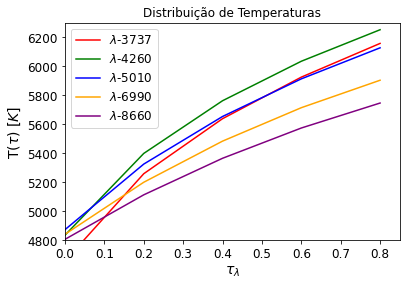

In [31]:
#Gráfico de temperatura por profundidade óptica para cada comprimento de onda
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

#definindo tamanhos do plot
plt.rc('font', size=SMALL_SIZE)         
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

#especificando os plots
plt.plot(dados['tau'],dados['T_tau_3737'], color='red',label='$\lambda$-3737')
plt.plot(dados['tau'],dados['T_tau_4260'], color='green',label='$\lambda$-4260')
plt.plot(dados['tau'],dados['T_tau_5010'], color='blue',label='$\lambda$-5010')
plt.plot(dados['tau'],dados['T_tau_6990'], color='orange',label='$\lambda$-6990')
plt.plot(dados['tau'],dados['T_tau_8660'], color='purple',label='$\lambda$-8660')
plt.title('Distribuição de Temperaturas')
plt.xlabel('$\u03C4_{\lambda}$')
plt.ylabel('T($\u03C4$) [$K$]')
plt.legend()
plt.axis([0.0,0.85,4800,6300]) # dimensionando
#plt.savefig('dis_temperaturas.png')
plt.show()

In [32]:
#temperatura efetiva do sol
T_eff = 5800

In [33]:
#temperatura do sol para diferentes profundidades ópticas
T_tau_sol = pow((3/4)*(dados['tau']+2/3),1/4)*T_eff

In [34]:
#verificando os cálculos
T_tau_sol

0    4877.199208
1    5207.824408
2    5485.301332
3    5726.099560
4    5939.859397
Name: tau, dtype: float64

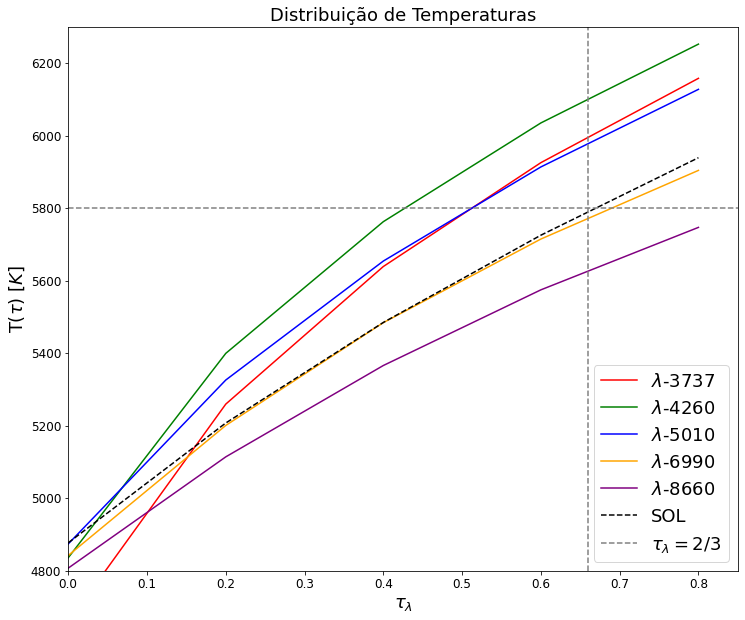

In [35]:
#plot do completo com Temperaturas para cada comprimento de onda e do Sol
plt.figure(figsize=(12,10))
plt.plot(dados['tau'],dados['T_tau_3737'], color='red',label='$\lambda$-3737')
plt.plot(dados['tau'],dados['T_tau_4260'], color='green',label='$\lambda$-4260')
plt.plot(dados['tau'],dados['T_tau_5010'], color='blue',label='$\lambda$-5010')
plt.plot(dados['tau'],dados['T_tau_6990'], color='orange',label='$\lambda$-6990')
plt.plot(dados['tau'],dados['T_tau_8660'], color='purple',label='$\lambda$-8660')
plt.plot(dados['tau'],T_tau_sol,color='black',linestyle='--',label='SOL')
plt.axvline(x=0.66, color='grey', linestyle='--',label='$\u03C4_{\lambda} = 2/3$')
plt.axhline(y=5800, color='grey', linestyle='--')
plt.title('Distribuição de Temperaturas',fontsize=18)
plt.xlabel('$\u03C4_{\lambda}$',fontsize=18)
plt.ylabel('T($\u03C4$) [$K$]',fontsize=18)
plt.legend(loc='lower right',fontsize=18)
plt.axis([0.0,0.85,4800,6300])
plt.savefig('dis_temperaturas.jpeg')
plt.show()